[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/LabForComputationalVision/principal-distortions/blob/main/notebooks/DistortionExampleDNNModels.ipynb)

In [ ]:
!pip install git+https://github.com/LabForComputationalVision/principal-distortions.git

  Cloning https://****@github.com/LabForComputationalVision/principal-distortions.git to /tmp/pip-req-build-fkog_kq1
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/LabForComputationalVision/principal-distortions.git' /tmp/pip-req-build-fkog_kq1
  Resolved https://****@github.com/LabForComputationalVision/principal-distortions.git to commit 083816e4f6da7f1283e94f4f7e056faf058954c1
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.4/399.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.0 MB

# Example Principal Distortion Generated with DNNs

We demonstrate generating principal distortions for DNN models. Models are selected from the Timm repository (part of Huggingface).

In [ ]:
%load_ext autoreload
%autoreload 2

import importlib
import torch as ch
import os
import sys
import argparse

import timm
from torchvision.models.feature_extraction import get_graph_node_names

from principal_distortions.run_neural_nets_principal_distortions import get_default_args
from principal_distortions import run_neural_nets_principal_distortions
from principal_distortions.plotting_functions import *
from principal_distortions.models.model_helpers import *


## Choose models and layers to test

### Search timm for candidate models and inspect their layers

Choose the models that you want to test, and choose the layers you will use for generating distortions.

For the basics of feature extraction, https://pytorch.org/vision/0.20/feature_extraction.html is a helpful guide.

In [ ]:
# Example: Search for some VIT models
match_string = 'resnet18*'
avail_pretrained_models = timm.list_models(match_string, pretrained=True)
print(f'### Models matching string {match_string} ###')
print(avail_pretrained_models)

model_for_layers = 'resnet18.a1_in1k'
model = timm.create_model(
    model_for_layers,
    pretrained=True,
    num_classes=0,  # remove classifier nn.Linear
)
model = model.eval()
print(f'\n### All model layers for {model_for_layers} ###')
print(f'### We suggest you choose a subset of layers, see example in next cell ###')
print(get_graph_node_names(model)[1])


### Models matching string resnet18* ###
['resnet18.a1_in1k', 'resnet18.a2_in1k', 'resnet18.a3_in1k', 'resnet18.fb_ssl_yfcc100m_ft_in1k', 'resnet18.fb_swsl_ig1b_ft_in1k', 'resnet18.gluon_in1k', 'resnet18.tv_in1k', 'resnet18d.ra2_in1k']


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/46.8M [00:00<?, ?B/s]


### All model layers for resnet18.a1_in1k ###
### We suggest you choose a subset of layers, see example in next cell ###
['x', 'conv1', 'bn1', 'act1', 'maxpool', 'layer1.0.conv1', 'layer1.0.bn1', 'layer1.0.drop_block', 'layer1.0.act1', 'layer1.0.aa', 'layer1.0.conv2', 'layer1.0.bn2', 'layer1.0.add', 'layer1.0.act2', 'layer1.1.conv1', 'layer1.1.bn1', 'layer1.1.drop_block', 'layer1.1.act1', 'layer1.1.aa', 'layer1.1.conv2', 'layer1.1.bn2', 'layer1.1.add', 'layer1.1.act2', 'layer2.0.conv1', 'layer2.0.bn1', 'layer2.0.drop_block', 'layer2.0.act1', 'layer2.0.aa', 'layer2.0.conv2', 'layer2.0.bn2', 'layer2.0.downsample.0', 'layer2.0.downsample.1', 'layer2.0.add', 'layer2.0.act2', 'layer2.1.conv1', 'layer2.1.bn1', 'layer2.1.drop_block', 'layer2.1.act1', 'layer2.1.aa', 'layer2.1.conv2', 'layer2.1.bn2', 'layer2.1.add', 'layer2.1.act2', 'layer3.0.conv1', 'layer3.0.bn1', 'layer3.0.drop_block', 'layer3.0.act1', 'layer3.0.aa', 'layer3.0.conv2', 'layer3.0.bn2', 'layer3.0.downsample.0', 'layer3.0.downs

### Make a list of the models and layers to include in distortion generation
For running timm models (from huggingface), we construct a list of models and layer names in the form "\<model_name>,\<layer_name>".

Two models and associated layers from the models are included as an example.

NOTE: Currently, code only supports models with the same size input. Choose the timm models appropriately.

In [ ]:
# Example models -- weights will be downloaded
test_models = [
               'tf_efficientnet_b0.in1k',
               'vit_base_patch16_224.augreg_in1k',
               ]

# Check that the transforms are the same for the models being compared
input_sizes = [timm.data.resolve_data_config(model=timm.create_model(m, pretrained=True).eval())['input_size'] for m in test_models]
assert len(set(str(t) for t in input_sizes))==1, 'Some models in test_models have different transforms. Check models.'


model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
# Make the list of layers
combined_model_layers = []
opacity_dict = {}
for model in test_models:
    if 'efficientnet' in model: # For new models, change the list generation here appropriately, or construct list by hand.
        layer_name = 'conv_stem'
        opacity_dict[layer_name] = (0+4) / (12+4)
        combined_model_layers.append(f'{model},{layer_name}')
        for l_idx in range(0,7,1):
            layer_name = f'blocks.{l_idx}'
            opacity_dict[layer_name] = (l_idx+4+1) / (12+4)
            combined_model_layers.append(f'{model},{layer_name}')

    elif 'vit' in model:
        layer_name = 'patch_embed'
        opacity_dict[layer_name] = (0+4) / (12+4)
        combined_model_layers.append(f'{model},{layer_name}')
        for l_idx in range(0,12,2): # Here, we skip some layers to speed up optimization
            layer_name = f'blocks.{l_idx}'
            opacity_dict[layer_name] = (l_idx+4+1) / (12+4)
            combined_model_layers.append(f'{model},{layer_name}')

model_layer_pairs = ';'.join(combined_model_layers)
print('### List of Model,Layers to analyze ###')
print(model_layer_pairs)


### List of Model,Layers to analyze ###
tf_efficientnet_b0.in1k,conv_stem;tf_efficientnet_b0.in1k,blocks.0;tf_efficientnet_b0.in1k,blocks.1;tf_efficientnet_b0.in1k,blocks.2;tf_efficientnet_b0.in1k,blocks.3;tf_efficientnet_b0.in1k,blocks.4;tf_efficientnet_b0.in1k,blocks.5;tf_efficientnet_b0.in1k,blocks.6;vit_base_patch16_224.augreg_in1k,patch_embed;vit_base_patch16_224.augreg_in1k,blocks.0;vit_base_patch16_224.augreg_in1k,blocks.2;vit_base_patch16_224.augreg_in1k,blocks.4;vit_base_patch16_224.augreg_in1k,blocks.6;vit_base_patch16_224.augreg_in1k,blocks.8;vit_base_patch16_224.augreg_in1k,blocks.10


## Set the optimization parameters

Set up the arguments for running the distortion processing. See notes below for each value.

In [ ]:
short_model_name = 'timm_effcientnet_vs_vit_example' # Experiment name used for saving

import pkg_resources
test_images = [get_example_image()]

all_args = get_default_args()
custom_args = {
    'model_layer_pairs': model_layer_pairs,  # Model layer pairs constructed in the previous cell
    'image_path': test_images[0],
    'output_base_path':'./results', # Save the results here
    'num_steps':50, # Number of steps for the optimization. Running a small number here for the demo.
    'output_custom_exp_name':short_model_name,
    'lr_start_end':[1.,-3.], # Set the schedule for the distortion optimization
    'seed':0, # Random Seed
    'perturb_clamp_scale':0.001, # Clamp the perturbations, i.e. constrained optimization
    'model_type':'timm', # Where to look for the model_layer_pairs. These models are timm models.
    'image_preproc_type':'DEFAULT_IMAGENET_TEST' # Preprocessing to use. See above note about preprocessing.
}

all_args.update(custom_args)
all_args = argparse.Namespace(**all_args)

## Run the optimization.

This will save the output as a pckl within `all_args.output_base_path`

Warning: Currently, for generation and loading the models, a separate copy of the model is created for each model/layer pair, which can cause problems scaling the generation if GPU memory is limited and you are generating principal distortions for many model/layer pairs. See noted `#TODO` in `WrapTimmModelLayer` in `models.model_helpers`.

/usr/lib/python3.11/contextlib.py:105: FutureWarning: `torch.backends.cuda.sdp_kernel()` is deprecated. In the future, this context manager will be removed. Please see `torch.nn.attention.sdpa_kernel()` for the new context manager, with updated signature.
  self.gen = func(*args, **kwds)


Loading tf_efficientnet_b0.in1k:conv_stem
Loading tf_efficientnet_b0.in1k:blocks.0
Loading tf_efficientnet_b0.in1k:blocks.1
Loading tf_efficientnet_b0.in1k:blocks.2
Loading tf_efficientnet_b0.in1k:blocks.3
Loading tf_efficientnet_b0.in1k:blocks.4
Loading tf_efficientnet_b0.in1k:blocks.5
Loading tf_efficientnet_b0.in1k:blocks.6
Loading vit_base_patch16_224.augreg_in1k:patch_embed
Loading vit_base_patch16_224.augreg_in1k:blocks.0
Loading vit_base_patch16_224.augreg_in1k:blocks.2
Loading vit_base_patch16_224.augreg_in1k:blocks.4
Loading vit_base_patch16_224.augreg_in1k:blocks.6
Loading vit_base_patch16_224.augreg_in1k:blocks.8
Loading vit_base_patch16_224.augreg_in1k:blocks.10


/usr/lib/python3.11/contextlib.py:105: FutureWarning: `torch.backends.cuda.sdp_kernel()` is deprecated. In the future, this context manager will be removed. Please see `torch.nn.attention.sdpa_kernel()` for the new context manager, with updated signature.
  self.gen = func(*args, **kwds)


step 0, size of update: 4398.45751953125, 3485.94140625, objective: 0.1305883675813675


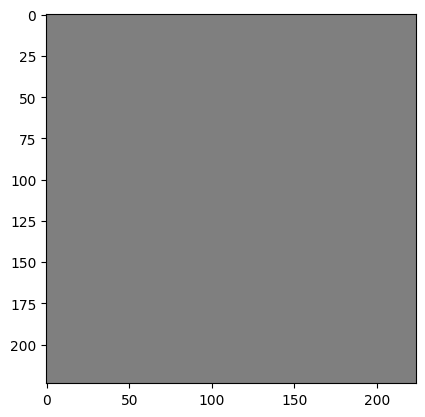

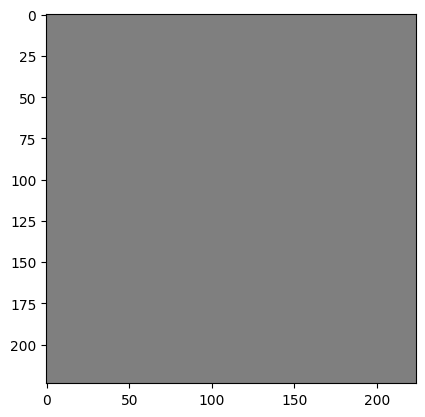

step 49, size of update: 5034.08203125, 62256.6875, objective: 43.58543395996094


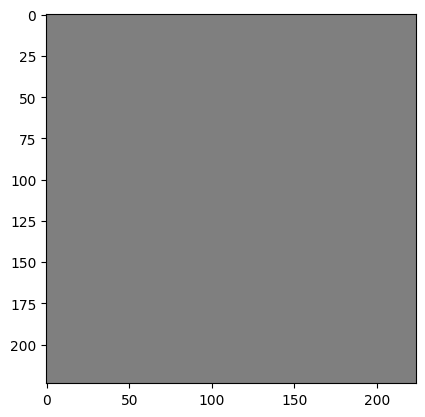

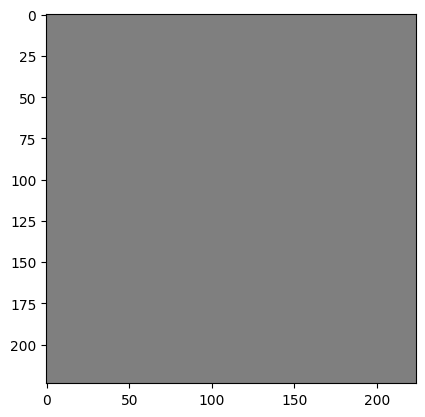

In [ ]:
#https://github.com/pytorch/pytorch/issues/116348 -- this is necessary for some of the transformers
with ch.backends.cuda.sdp_kernel(enable_flash=False, enable_math=True, enable_mem_efficient=False):
    run_neural_nets_principal_distortions.main(all_args)

## Load the models into the notebook.

Load all of the models into the notebook so that we can use them for plotting.

In [ ]:
device = 'cuda'

model_layer_list = [(model_layer.split(',')[0], model_layer.split(',')[1])
                    for model_layer in model_layer_pairs.split(';')]

model_list = []
for (model_name, layer) in model_layer_list:
    model = WrapTimmModelLayer(model_name, layer)
    model.to(device)
    model_list.append(model)

## Make the sensitivity log ratio plot, and  show the original image along with example distortions.

/usr/lib/python3.11/contextlib.py:105: FutureWarning: `torch.backends.cuda.sdp_kernel()` is deprecated. In the future, this context manager will be removed. Please see `torch.nn.attention.sdpa_kernel()` for the new context manager, with updated signature.
  self.gen = func(*args, **kwds)


Loading results from ./results/timm_effcientnet_vs_vit_example/ChickadeeCC_lr_1.0_-3.0_steps_50_norm_0.1_clamp_0.001_gaussian_False_cutoff_None_seed_0


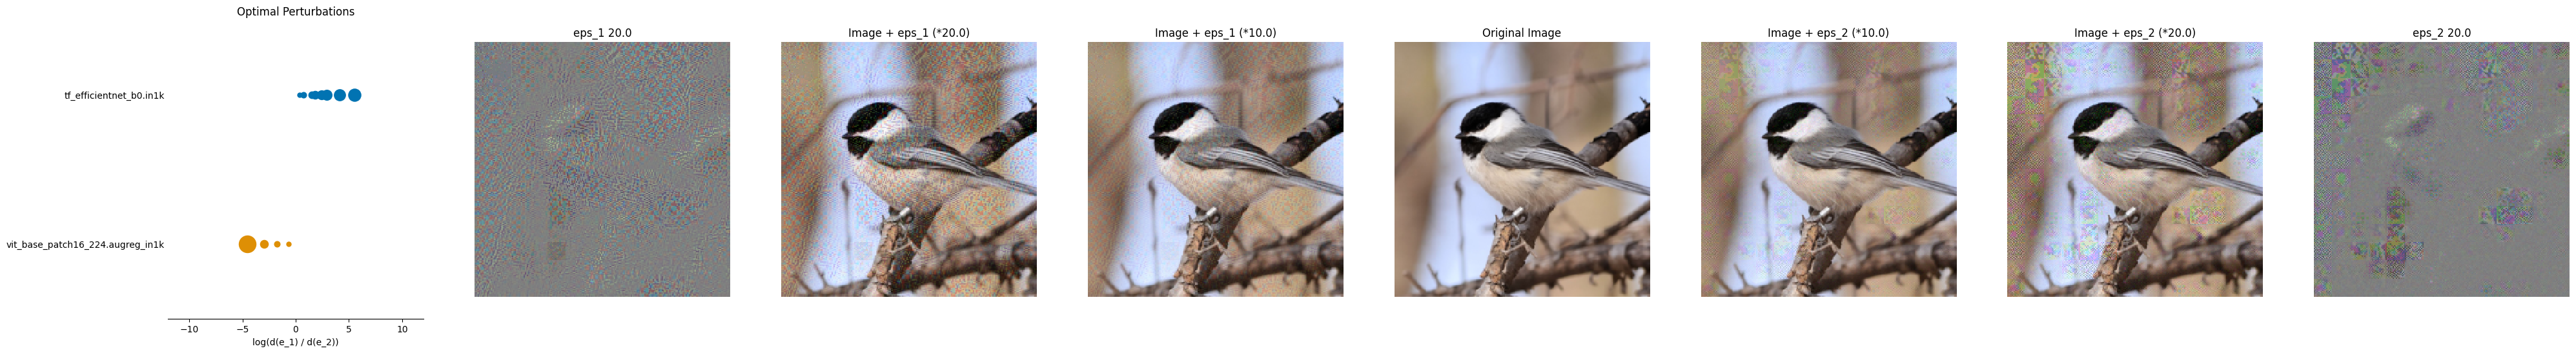

In [ ]:
with ch.backends.cuda.sdp_kernel(enable_flash=False, enable_math=True, enable_mem_efficient=False):
    show_examples_with_varying_perturbations(all_args,
                                             test_images,
                                             model_list=model_list,
                                             vertical_layout=False,
                                             perturb_scales=[200,100],# [200,100],
                                             model_for_positive_thresh=model_list[5],
                                             opacity_dict=opacity_dict,
                                             )
